In [ ]:
import pandas as pd
df = pd.read_csv('As2txt.txt', sep=";",header=None)
df.columns = df.iloc[0] 

df = df[1:]
print(df)
# df.head()
# df.dtypes

0    age            job  marital  education  ... pdays previous poutcome   y
1     30     unemployed  married    primary  ...    -1        0  unknown  no
2     33       services  married  secondary  ...   339        4  failure  no
3     35     management   single   tertiary  ...   330        1  failure  no
4     30     management  married   tertiary  ...    -1        0  unknown  no
5     59    blue-collar  married  secondary  ...    -1        0  unknown  no
...   ..            ...      ...        ...  ...   ...      ...      ...  ..
4517  33       services  married  secondary  ...    -1        0  unknown  no
4518  57  self-employed  married   tertiary  ...    -1        0  unknown  no
4519  57     technician  married  secondary  ...    -1        0  unknown  no
4520  28    blue-collar  married  secondary  ...   211        3    other  no
4521  44   entrepreneur   single   tertiary  ...   249        7    other  no

[4521 rows x 17 columns]


***Exploratory Data Analysis for Logistic Regression for Binary Classification***

# **Univariate Analysis**

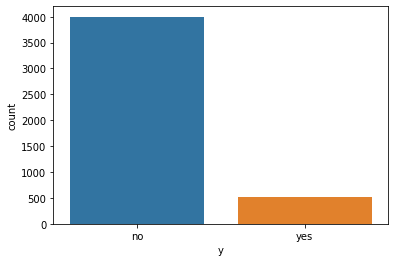

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library

 
# count plot on single categorical variable
sns.countplot(x ='y', data = df)
 
# Show the plot
plt.show()


From above we can observe that most of the data is negative or negative chance of clients subscribing to a term deposit

# **Bivariate Analysis**

Fitting in simple logistic regression model to determine the predictor variables

Optimization terminated successfully.
         Current function value: 0.356339
         Iterations 6


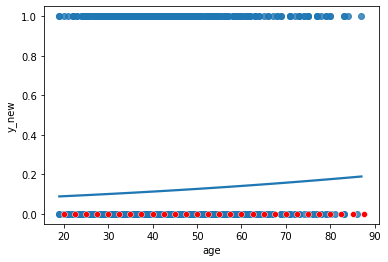

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)


df["age"] = pd.to_numeric(df["age"])
df['age'] = df.age.astype(float)

import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency1 = logit("y_new ~ age", data = df).fit() 
explanatory_data1 = pd.DataFrame({"age": np.arange(20, 90, 2.5)}) 
prediction_data1 = explanatory_data1.assign(y_new = mdl_recency1.predict(explanatory_data1)) 
 
prediction_data1["most_likely_outcome"] = np.round(prediction_data1["y_new"]) 
sns.regplot(x="age",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="age", y="most_likely_outcome",data=prediction_data1,color="red")
plt.show() 

1. Getting the most likely outcome
One simpler prediction I can make, rather than calculating probabilities of a response, is to calculate the most likely response. That is, if the probability of subscribing to a term deposit is less than 0-point-5, the most likely outcome is that they won't subscribe to a term deposit. If their probability is greater then 0-point-5, it's more likely that they will subscribe to a term deposi. To calculate this, I simply round the predicted probabilities using numpy's round() function.

2. Visualizing most likely outcome
I plotted the most likely outcome by using the prediction data with the numbers I just calculated. For the variation in age, the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

Optimization terminated successfully.
         Current function value: 0.524467
         Iterations 6


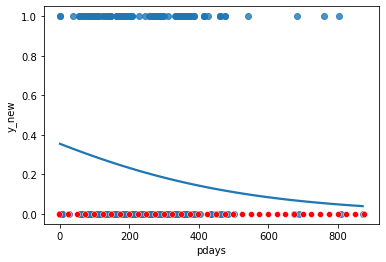

In [ ]:
df["pdays"] = pd.to_numeric(df["pdays"])
df['pdays'] = df.pdays.astype(float)

df['y_new'] = pd.factorize(df.y)[0]
df['y_new'] = df_pdays.y_new.astype(float)

import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency = logit("y_new ~ pdays", data = df).fit() 
explanatory_data = pd.DataFrame({"pdays": np.arange(-1, 890, 25)}) 
prediction_data = explanatory_data.assign(y_new = mdl_recency.predict(explanatory_data)) 

 
prediction_data["most_likely_outcome_pdays"] = np.round(prediction_data["y_new"]) 
sns.regplot(x="pdays",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="pdays", y="most_likely_outcome_pdays",data=prediction_data,color="red")
plt.show() 


From the above graph, for the variation in number of days that passed by after the client was last contacted from a previous campaign, the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

Optimization terminated successfully.
         Current function value: 0.352410
         Iterations 6


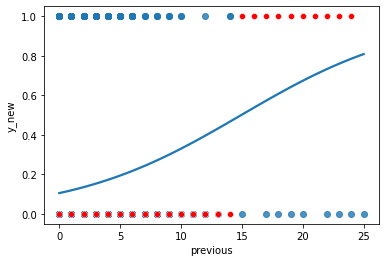

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["previous"] = pd.to_numeric(df["previous"])
df['previous'] = df.previous.astype(float)
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)

# # print(df)
# # df.dtypes
import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency_previous = logit("y_new ~ previous", data = df).fit() 
explanatory_data_previous = pd.DataFrame({"previous": np.arange(0, 25, 1)}) 
prediction_data_previous = explanatory_data_previous.assign(y_new = mdl_recency_previous.predict(explanatory_data_previous)) 
prediction_data_previous["most_likely_outcome_previous"] = np.round(prediction_data_previous["y_new"]) 
sns.regplot(x="previous",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="previous", y="most_likely_outcome_previous",data=prediction_data_previous,color="red")
plt.show() 


From the above graph, for the number of days that passed by after the client was last contacted from a previous campaign, when the number of days is low, the most likely outcome is that they won't subscribe to a term deposit. Otherwise, they will subscribe to a term deposit. So this is eligible to be a predictor variable.

Optimization terminated successfully.
         Current function value: 0.357186
         Iterations 6


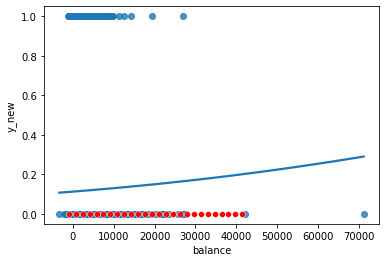

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["balance"] = pd.to_numeric(df["balance"])
df['balance'] = df.balance.astype(float)
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)


import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency_balance = logit("y_new ~ balance", data = df).fit() 
explanatory_data_balance = pd.DataFrame({"balance": np.arange(-1000, 70000, 3000)}) 
prediction_data_balance = explanatory_data_balance.assign(y_new = mdl_recency_balance.predict(explanatory_data_balance)) 
prediction_data_balance["most_likely_outcome_balance"] = np.round(prediction_data_balance["y_new"]) 
sns.regplot(x="balance",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="balance", y="most_likely_outcome_balance",data=prediction_data_balance,color="red")
plt.show()

From the above graph, for the variation in account balance of the client, the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

Optimization terminated successfully.
         Current function value: 0.354841
         Iterations 7


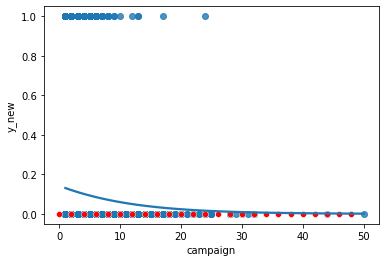

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df["campaign"] = pd.to_numeric(df["campaign"])
df['campaign'] = df.campaign.astype(float)
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)


import statsmodels.formula.api
from statsmodels.formula.api import logit
mdl_recency_campaign = logit("y_new ~ campaign", data = df).fit() 
explanatory_data_campaign = pd.DataFrame({"campaign": np.arange(0, 50, 2)}) 
prediction_data_campaign = explanatory_data_campaign.assign(y_new = mdl_recency_campaign.predict(explanatory_data_campaign)) 
prediction_data_campaign["most_likely_outcome_campaign"] = np.round(prediction_data_campaign["y_new"]) 
sns.regplot(x="campaign",y="y_new", data=df, ci=None, logistic=True)

sns.scatterplot(x="campaign", y="most_likely_outcome_campaign",data=prediction_data_campaign,color="red")
plt.show()

From the above graph, for the variation in the number of contacts performed during this campaign and for this client,the most likely outcome is that they won't subscribe to a term deposit. so I will drop this variable from our predictor variables.

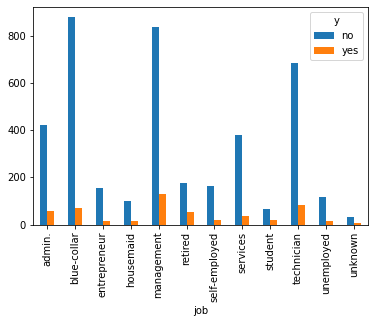

In [ ]:
pd.crosstab(df.job,df.y).plot(kind='bar')

From above chart there seem to be some impact of job on subscribing a term deposit but it is not major hence we will ignore job in our analysis

y           no  yes
marital            
divorced   451   77
married   2520  277
single    1029  167


(19.03005634409817,
 7.373535401823763e-05,
 2,
 array([[ 467.15328467,   60.84671533],
        [2474.67374475,  322.32625525],
        [1058.17297058,  137.82702942]]))

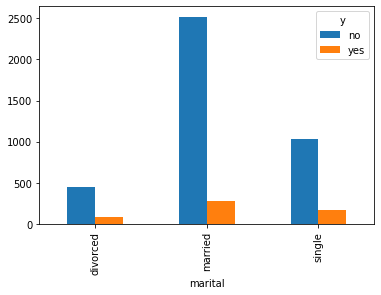

In [ ]:
pd.crosstab(df.marital,df.y).plot(kind='bar')
myField1_marital = df['marital']
myField2_marital = df['y']
myCrosstable_marital = pd.crosstab(myField1_marital, myField2_marital)
print(myCrosstable_marital)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_marital, pVal_marital, df_marital, exp_marital = chi2_contingency(myCrosstable_marital)
chiVal_marital, pVal_marital, df_marital, exp_marital

From the above output, the first value is the **chi-square** value of 19.03005634409817. The chance of such a value or even more extreme, in a sample, if there is no association in the population is 7.37e-5 (the second value). This is known as the p-value or significance. It is considered 'significant' usually if this value is below 0.05, which in this case it is. This indicates then an association between the two variables (one has an impact on the other).

The third value is the degrees of freedom, which is an indication of the size of the table, since it is simply the number of rows - 1, times the number of columns - 1.

The last array are the so called expected values. These are the counts to be expected if the two variables had no influence on each other.

So my observation from the graph and the chi-square test is that divorced people has the highest chance of subscribing to a term deposit, then comes single people and lastly married people has the lowest chance of subscribing to a term deposit, as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

y            no  yes
education           
primary     614   64
secondary  2061  245
tertiary   1157  193
unknown     168   19


(15.236579554873757,
 0.001625240003630989,
 3,
 array([[ 599.867286  ,   78.132714  ],
        [2040.2565804 ,  265.7434196 ],
        [1194.42601194,  155.57398806],
        [ 165.45012165,   21.54987835]]))

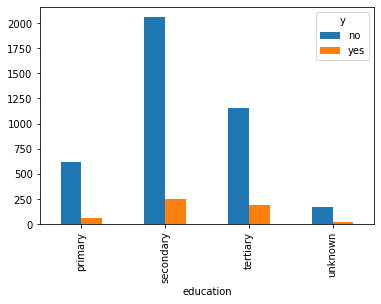

In [ ]:
pd.crosstab(df.education,df.y).plot(kind='bar')
myField1_education = df['education']
myField2_education = df['y']
myCrosstable_education = pd.crosstab(myField1_education, myField2_education)
print(myCrosstable_education)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_education, pVal_education, df_education, exp_education = chi2_contingency(myCrosstable_education)
chiVal_education, pVal_education, df_education, exp_education

So my observation from the graph and the **chi-square test** is that tertiary educated people has the highest chance of subscribing to a term deposit, then comes secondary educated people and lastly primary educated people has the lowest chance of subscribing to a term deposit, as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

y       no  yes
loan           
no    3352  478
yes    648   43


(21.87182161746215,
 2.9148288298428256e-06,
 1,
 array([[3388.63083389,  441.36916611],
        [ 611.36916611,   79.63083389]]))

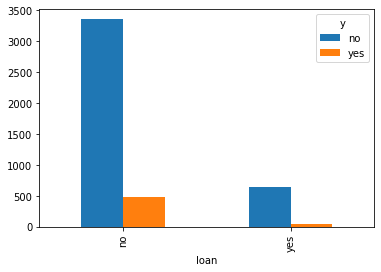

In [ ]:
pd.crosstab(df.loan,df.y).plot(kind='bar')
myField1 = df['loan']
myField2 = df['y']
myCrosstable = pd.crosstab(myField1, myField2)
print(myCrosstable)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_loan, pVal_loan, df_loan, exp_loan = chi2_contingency(myCrosstable)
chiVal_loan, pVal_loan, df_loan, exp_loan

So my observation from the graph and the **chi-square test** is that people who does not have a personal loan has the highest chance of subscribing to a term deposit and also as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

(0.008753166978396806,
 0.9254599873026758,
 1,
 array([[3932.75823933,  512.24176067],
        [  67.24176067,    8.75823933]]))

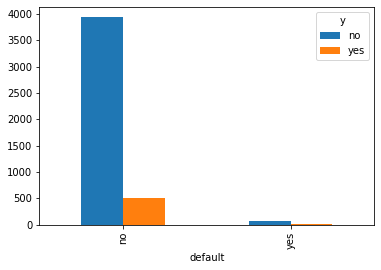

In [ ]:
pd.crosstab(df.default,df.y).plot(kind='bar')
myField1_default = df['default']
myField2_default = df['y']
myCrosstable_default = pd.crosstab(myField1_default, myField2_default)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_default, pVal_default, df_default, exp_default = chi2_contingency(myCrosstable_default)
chiVal_default, pVal_default, df_default, exp_default

So my observation from the graph and the **chi-square test** is the p-value is much higher than 0.05 we will not consider this variable as our predictor variable.

y          no  yes
housing           
no       1661  301
yes      2339  220


(48.88462833144263,
 2.7146998959323014e-12,
 1,
 array([[1735.89913736,  226.10086264],
        [2264.10086264,  294.89913736]]))

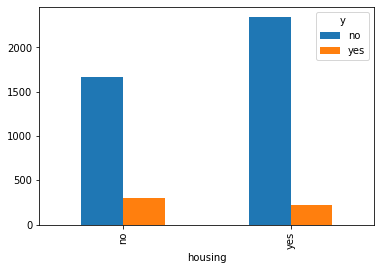

In [ ]:
pd.crosstab(df.housing,df.y).plot(kind='bar')
myField1_housing = df['housing']
myField2_housing = df['y']
myCrosstable_housing = pd.crosstab(myField1_housing, myField2_housing)
print(myCrosstable_housing)
import scipy.stats
from scipy.stats import chi2_contingency
chiVal_housing, pVal_housing, df_housing, exp_housing = chi2_contingency(myCrosstable_housing)
chiVal_housing, pVal_housing, df_housing, exp_housing

So my observation from the graph and the chi-square test is that people who does not have a housing loan has the highest chance of subscribing to a term deposit and also as the p-value is much lower than 0.05 we will consider this variable as our predictor variable.

In [ ]:
# Making the predictor dataframe by dropping other variables, I did not consider contact, day, month, poutcome as they did not seem important from the get go. 
# Also the problem states to not take duration as predictor as it states- "this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model"
# dropping rows for unknown values in education column
df_predict = df.drop(df_predict.index[df_predict['education'] == 'unknown'])
df_predict1=df_predict.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])


df_predict1



,marital,education,housing,loan,previous
1,married,primary,no,no,0.0
2,married,secondary,yes,yes,4.0
3,single,tertiary,yes,no,1.0
4,married,tertiary,yes,yes,0.0
5,married,secondary,yes,no,0.0
6,single,tertiary,no,no,3.0
7,married,tertiary,yes,no,2.0
8,married,secondary,yes,no,0.0
9,married,tertiary,yes,no,0.0
10,married,primary,yes,yes,2.0


**Predictor Dataframe**

In [ ]:
# putting dummy variables in categorical columns
education_dummies = pd.get_dummies(df_predict1.education, prefix="education")
df_with_dummies = pd.concat([df_predict1,education_dummies],axis='columns')
df_with_dummies.drop('education',axis='columns',inplace=True)
marital_dummies = pd.get_dummies(df_with_dummies.marital, prefix="marital")
df_with_dummies1 = pd.concat([df_with_dummies,marital_dummies],axis='columns')
df_with_dummies1.drop('marital',axis='columns',inplace=True)
housing_dummies = pd.get_dummies(df_with_dummies1.housing, prefix="housing")
df_with_dummies2 = pd.concat([df_with_dummies1,housing_dummies],axis='columns')
df_with_dummies2.drop('housing',axis='columns',inplace=True)
loan_dummies = pd.get_dummies(df_with_dummies2.loan, prefix="loan")
df_with_dummies3 = pd.concat([df_with_dummies2,loan_dummies],axis='columns')
df_with_dummies3.drop('loan',axis='columns',inplace=True)
df_with_dummies3.head()
# df_with_dummies3.dtypes

,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
1,0.0,1,0,0,0,0,1,0,1,0,1,0
2,4.0,0,1,0,0,0,1,0,0,1,0,1
3,1.0,0,0,1,0,0,0,1,0,1,1,0
4,0.0,0,0,1,0,0,1,0,0,1,0,1
5,0.0,0,1,0,0,0,1,0,0,1,1,0


In [ ]:
# Make whole dataframe float type
df_with_dummies3 = df_with_dummies3.astype(float)
df_with_dummies3.dtypes

previous               float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
marital_divorced       float64
marital_married        float64
marital_single         float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
dtype: object

In [ ]:
X = df_with_dummies3
X.head()

,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y1 = df_predict.y_new

## **1. Using Logistic Regression Classifier**

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8)

Above I have taken train size as 0.8 so I have take 80% data for training and 20% data for test

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Here, it shows the predictions for our test dataset

In [ ]:
model.score(X_test,y_test)

0.8839779005524862

Above the accuracy of the logistic regression model is shown

In [ ]:
X_t_new=X_test
predicion_values=model.predict(X_test_new)
X_test_new['predicion_values'] = predicion_values.tolist()
print(X_test_new)

      previous  education_primary  education_secondary  education_tertiary  \
3918       0.0                0.0                  1.0                 0.0   
948        0.0                0.0                  1.0                 0.0   
3787       0.0                0.0                  1.0                 0.0   
1653       0.0                0.0                  1.0                 0.0   
3728       0.0                0.0                  1.0                 0.0   
744        0.0                1.0                  0.0                 0.0   
4086       0.0                0.0                  0.0                 1.0   
2806       0.0                1.0                  0.0                 0.0   
3260       0.0                0.0                  1.0                 0.0   
4209       0.0                0.0                  1.0                 0.0   
1163       0.0                0.0                  1.0                 0.0   
822        1.0                0.0                  0.0          

Here, X_test_new shows the test dataframe with our predicted output values

## **2. Using Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC
# the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# when gamma=auto that represents gamma's default value which is '1/number_of_features'
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.8917127071823204

Above the accuracy of the SVM model is shown. SVM uses a technique called the kernel trick to transform data and then based on these transformations it finds an optimal boundary between the possible outputs. So, it does some extremely complex data transformations, then figures out how to seperate the data based on the labels or outputs I've defined.

## **3. Using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
# n_estimators : This is the number of trees I want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees gives  better performance but makes tend to make code slower.
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8773480662983425

Above the accuracy of the Random Forest model is shown. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.Therefore, in random forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. 

## **4. Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8751381215469614


Above the accuracy of the Decision Tree model is shown.
Decision Tree works by selecting the best attribute using Attribute Selection.It measures(ASM) to split the records.
And makes that attribute a decision node and breaks the dataset into smaller subsets.
Then starts tree building by repeating this process recursively for each child until one of the condition will match:
1. All the tuples belong to the same attribute value.
2. There are no more remaining attributes.
3. There are no more instances.


**Observation** : From the above four classification model implementations we can observe that their accuracy are very similar